In [1]:
# importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/shant/Desktop/Data/vgsales.csv") # importing the csv and saving it to df

In [3]:
df.head() # checking the first 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail() # checking the last 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.shape # checking the shape

(16598, 11)

In [6]:
df.columns # checking column names

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.info() # checking an overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe() # checking the trend of the numerical data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.describe(include=['object']) # checking the trend of categorical data

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [10]:
df.nunique() # checking the number of unique values per column

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

# Initial analysis observations

### 1.) The dataset is a collection of video game titles that have ranks associated with them along with other information such as platform it was released on, year of release, genre of the game, publisher of the title, North America Sales figures, Europe Sales figures, Japan Sales figures, and Sales figures in other parts along with Global Sales figures.
### 2.) There are a total of 16598 rows but the rank at the end is 16600 so will need to check if there is any inconsistency there
### 3.) The year is in float64 format so it needs to be typecasted to integer for better analysis capability

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [12]:
# There seems to be no complete duplicates
# checking for duplicates across titles

df['Name'].duplicated().sum()

5105

In [13]:
# There seems to be 5105 titles that are duplicated
# Taking a look at the duplicated titles

df[df['Name'].duplicated()].sort_values(by='Name')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3038,3040,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
1739,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20,1.16
4499,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
9318,9320,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.14
14547,14550,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...
3303,3305,pro evolution soccer 2011,X360,2010.0,Sports,Konami Digital Entertainment,0.09,0.44,0.00,0.07,0.61
2595,2597,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.79
12605,12607,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0.00,0.05,0.00,0.01,0.06
7088,7090,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23


In [14]:
# Many duplicates seem to be of re-releases or releases on different platforms
# Checking for duplicates across these two specific columns along with years

df[df[['Name','Platform','Year']].duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.0,0.01


In [15]:
# The above two titles seem to be duplicates as they have the same ba

# For the game Madden NFL 13 on PS3 it seems to have the same values apart from sales numbers
df[(df['Name'] == 'Madden NFL 13') & (df['Platform'] == 'PS3')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


In [16]:
# For the game Wii de Asobu: Metroid Prime on Wii Seems to be complete duplicates apart from rank
df[(df['Name'] == 'Wii de Asobu: Metroid Prime') & (df['Platform'] == 'Wii')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [17]:
# Dropping Wii de Asobu: Metroid Prime on Wii and Madden NFL 13 on PS3 as they are the same game
df.drop_duplicates(subset=['Name','Platform','Year'],keep='first',inplace=True,ignore_index=True)

In [18]:
# Drop was successful
# Now to address the others
df[df.duplicated(subset=['Name','Platform'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.17,0.02,0.10,1.29
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.0,0.48,0.00,0.00,0.48
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08


In [19]:
# There seems to be 3 more duplicates
# Checking for Need for Speed: Most Wanted on X360
df[(df['Name'] == 'Need for Speed: Most Wanted') & (df['Platform'] == 'X360')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29


In [20]:
# Upon research it was found that Need for Speed: Most Wanted was re-released in 2012 on X360 so keepint it as it is
# Checking for Sonic the Hedgehog on PS3
df[(df['Name'] == 'Sonic the Hedgehog') & (df['Platform'] == 'PS3')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1715,1717,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48


In [21]:
# It seems Sonic the Hedgehog on PS3 has two entries with the same name and platform
# But one has null values for Year and Publisher
# This will not be effective for analysis so dropping the entry with the null values
df = df[(df['Rank'] != 4147)]

In [22]:
# The duplicated value has been dropped
df[(df['Name'] == 'Sonic the Hedgehog') & (df['Platform'] == 'PS3')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1715,1717,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18


In [23]:
# Checking for Need for Speed: Most Wanted on PC
df[(df['Name'] == 'Need for Speed: Most Wanted') & (df['Platform']=='PC')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.0,0.05,0.30
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.0,0.02,0.08


In [24]:
# Upon research it was found that Need for Speed: Most Wanted was re-released in 2012 on PC so keepint it as it is
# Checking for more duplicates based on Rank, Name, Platform and Genre
df['Rank'].duplicated().sum()

0

In [25]:
# There are no duplicated Ranks
# Checking for the others
df[['Name','Platform','Year']].duplicated().sum()

0

In [26]:
# There are no more True duplicates
# The dataset is now clear of duplicates
# Now to handle Null values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            269
Genre             0
Publisher        57
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [27]:
# Year seems to have 269 null values
# Publisher seems to have 57 non null values
# Let us check the percentage
df.isna().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.620970
Genre           0.000000
Publisher       0.343477
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [28]:
# Since null values are less than 3% across the dataset, removing them
df.dropna(subset=['Year','Publisher'],inplace=True)

In [29]:
# Checking to see if nulls have been dropped
df.isna().mean()*100

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

In [30]:
# Nulls have been dropped. Confirmed
# Converting the year to integer
df['Year'] = df['Year'].astype(int)

In [31]:
# Checking to see confirmation of conversion and further requirement of processing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16290 non-null  int64  
 1   Name          16290 non-null  object 
 2   Platform      16290 non-null  object 
 3   Year          16290 non-null  int32  
 4   Genre         16290 non-null  object 
 5   Publisher     16290 non-null  object 
 6   NA_Sales      16290 non-null  float64
 7   EU_Sales      16290 non-null  float64
 8   JP_Sales      16290 non-null  float64
 9   Other_Sales   16290 non-null  float64
 10  Global_Sales  16290 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [32]:
# Rank, NA_Sales, EU_Sales, JP_Salesm, Others_Sales and Global_Sales seem to be in 64 bit format, which is not necessary as it takes up unnecessary space
# Convering them to their 32 bit formats

df['Rank'] = df['Rank'].astype(int)

In [33]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].astype('float32')

In [34]:
# Checking for redundancy in Platform column
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [35]:
# Although there is no redundancy
#Making a new column named Platform_clean to store platform names in a format that is readable and understandable by all
platform_names = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'Super Nintendo',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation 1',
    'XB': 'Original Xbox',
    'PC': 'PC',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'GC': 'Nintendo GameCube',
    'WiiU': 'Nintendo Wii U',
    'GEN': 'Sega Genesis',
    'DC': 'Dreamcast',
    'PSV': 'PlayStation Vita',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive',
    'GG': 'Game Gear',
    'PCFX': 'PC-FX'
}
df['Platform_clean'] = df['Platform'].map(platform_names)

In [36]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998,Nintendo Wii
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002,Nintendo Entertainment System
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000,Nintendo Wii
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000,Nintendo Wii
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.370001,Game Boy


In [37]:
# Checking for redundancy in Genre
df['Genre'].value_counts()

Genre
Action          3251
Sports          2303
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [38]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [39]:
# There is no redundancy in Genre and they are well defined
# Checking for redundancy in Publisher
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [40]:
# Although there is no redundancy
# Making a new column to store parent company of publishers

publisher_map = {
    
    'Square': 'SquareSoft',
    'SquareSoft': 'SquareSoft',
    'Square EA': 'SquareSoft',
    'Enix Corporation': 'Enix',
    'Square Enix': 'Square Enix',
    
    'Sony Computer Entertainment': 'Sony',
    'Sony Computer Entertainment Europe': 'Sony',
    'Sony Computer Entertainment America': 'Sony',
    'Sony Online Entertainment': 'Sony',
    'Sony Music Entertainment': 'Sony',

    'Electronic Arts': 'Electronic Arts',
    'EA Games': 'Electronic Arts',
    'Electronic Arts Victor': 'Electronic Arts',

    'Activision': 'Activision',
    'Activision Blizzard': 'Activision',
    'Activision Value': 'Activision',

    'Ubisoft': 'Ubisoft',
    'Ubisoft Annecy': 'Ubisoft',

    'Valve': 'Valve',
    'Valve Software': 'Valve',

    'THQ': 'THQ Nordic',
    'THQ Nordic': 'THQ Nordic',
    'Nordic Games': 'THQ Nordic',

    'LucasArts': 'LucasArts',
    'Lucasfilm Games': 'LucasArts',

    'Namco Bandai Games': 'Bandai Namco',
    'Bandai Namco': 'Bandai Namco',
    'Bandai': 'Bandai Namco',
    'Namco': 'Bandai Namco',

    'Konami Digital Entertainment': 'Konami',

    'Atari': 'Atari',
    'Infogrames': 'Atari',
    'Atari (former Infogrames)': 'Atari',

    '3DO': '3DO',
    'The 3DO Company': '3DO',

    'Deep Silver': 'Deep Silver',
    'Koch Media': 'Deep Silver',

    'Capcom Co., Ltd.': 'Capcom',
    'Capcom': 'Capcom',

    'Microsoft Game Studios': 'Microsoft',
    'Microsoft': 'Microsoft',

    'Take-Two Interactive': 'Take-Two',
    '2K Games': 'Take-Two',
    'Rockstar Games': 'Take-Two',
    
}


df['Publisher_parent'] = df['Publisher'].replace(publisher_map)

In [41]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998,Nintendo Wii,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002,Nintendo Entertainment System,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000,Nintendo Wii,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000,Nintendo Wii,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.370001,Game Boy,Nintendo


### Data cleaning and preparation complete

# _Analysis_ & _-Visualization-_

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16595
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16290 non-null  int32  
 1   Name              16290 non-null  object 
 2   Platform          16290 non-null  object 
 3   Year              16290 non-null  int32  
 4   Genre             16290 non-null  object 
 5   Publisher         16290 non-null  object 
 6   NA_Sales          16290 non-null  float32
 7   EU_Sales          16290 non-null  float32
 8   JP_Sales          16290 non-null  float32
 9   Other_Sales       16290 non-null  float32
 10  Global_Sales      16290 non-null  float32
 11  Platform_clean    16290 non-null  object 
 12  Publisher_parent  16290 non-null  object 
dtypes: float32(5), int32(2), object(6)
memory usage: 1.3+ MB


In [43]:
df['Name'].head()

0                  Wii Sports
1           Super Mario Bros.
2              Mario Kart Wii
3           Wii Sports Resort
4    Pokemon Red/Pokemon Blue
Name: Name, dtype: object

## The top 5 ranked games of all time are
### 1.) Wii Sports
### 2.) Super Mario Bros.
### 3.) Mario Kart Wii
### 4.) Wii Sports Resort
### 5.) Pokemon Red/Pokemon Blue

In [44]:
df['Platform_clean'].value_counts().head()

Platform_clean
Nintendo DS      2131
PlayStation 2    2127
PlayStation 3    1303
Nintendo Wii     1290
Xbox 360         1234
Name: count, dtype: int64

## Top 5 platforms with the most number of games of all time are
### 1.) Nintendo DS with 2131 games
### 2.) PlayStation 2 with 2127 games
### 3.) PlayStation 3 with 1303 games
### 4.) Nintendo Wii with 1290 games
### 5.) Xbox 360 with 1234 games

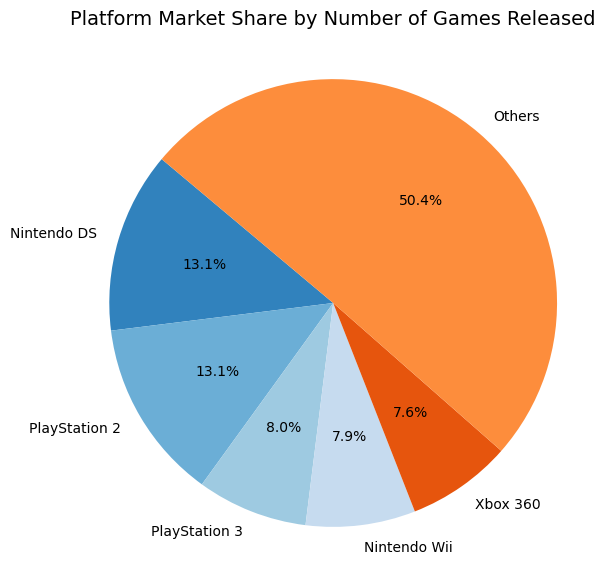

In [45]:
platform_counts = df['Platform_clean'].value_counts()
# Top 5 platforms
top_5 = platform_counts.head(5)
top_5_labels = top_5.index.tolist()
top_5_values = top_5.values.tolist()

# All others combined
others_value = platform_counts.iloc[5:].sum()

# Add "Others" to labels and values
labels = top_5_labels + ['Others']
values = top_5_values + [others_value]

# Pie chart
plt.figure(figsize=(6, 6))
colors = plt.get_cmap('tab20c').colors
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors[:6])
plt.title('Platform Market Share by Number of Games Released', fontsize=14)
plt.axis('equal')  # Equal aspect ratio to ensure it's a circle
plt.tight_layout()
plt.show()

## As evident from the pie chart above, the top 5 platforms alone take up 49.6% of the total games released

In [46]:
df['Publisher_parent'].value_counts().head()

Publisher_parent
Electronic Arts    1341
Activision          996
Ubisoft             932
Bandai Namco        928
Konami              823
Name: count, dtype: int64

## The top 5 Publishers with most number of published games of all time are
### 1.) Electronic Arts with 1341 games published
### 2.) Activision with 996 games published
### 3.) Ubisoft with 932 games published
### 4.) Bandai Namco with 928 games published
### 5.) Konami with 823 games published

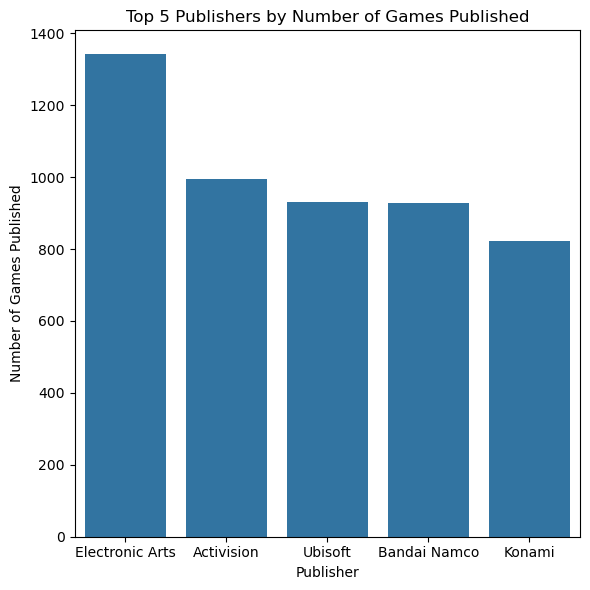

In [47]:
top_publishers = df['Publisher_parent'].value_counts().head().reset_index()
top_publishers.columns = ['Publisher', 'Game_Count']

plt.figure(figsize=(6, 6))
sns.barplot(data=top_publishers, x='Publisher', y='Game_Count')
plt.title('Top 5 Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')

plt.tight_layout()
plt.show()

## It is evident from the above chart that out of the top 5, EA has made significantly more games

In [48]:
df.sort_values(by='NA_Sales',ascending = False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998,Nintendo Wii,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002,Nintendo Entertainment System,Nintendo
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.930000,0.63,0.28,0.47,28.309999,Nintendo Entertainment System,Nintendo
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.200001,2.26,4.22,0.58,30.260000,Game Boy,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000,Nintendo Wii,Nintendo


## Top 5 Grossing games in North America of all time are
### 1.) Wii Sports with 41.49 million copies sold
### 2.) Super Mario Bros. with 29.08 million copies sold
### 3.) Duck Hunt with 26.93 million copies sold
### 4.) Tetris with 23.20 million copies sold
### 5.) Mario Kart Wii with 15.85 million copies sold

In [49]:
df.sort_values(by='EU_Sales',ascending = False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998,Nintendo Wii,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000,Nintendo Wii,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000,Nintendo Wii,Nintendo
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.070000,11.00,1.93,2.75,24.760000,Nintendo DS,Nintendo
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.010000,9.27,0.97,4.14,21.400000,PlayStation 3,Take-Two


## Top 5 Grossing games in Europe of all time are
### 1.) Wii Sports with 29.02 million copies sold
### 2.) Mario Kart Wii with 12.88 million copies sold
### 3.) Wii Sports Resort with 11.01 million copies sold
### 4.) Nontendogs with 11 million copies sold
### 5.) Grand Theft Auto V with 9.27 million copies sold

In [50]:
df.sort_values(by='JP_Sales',ascending = False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.370001,Game Boy,Nintendo
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.100000,Game Boy,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.240002,Nintendo Entertainment System,Nintendo
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.010000,Nintendo DS,Nintendo
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.360001,Nintendo DS,Nintendo


## Top 5 Grossing games in Japan of all time are
### 1.) Pokemon Red/Pokemon Blue with 10.22 million copies sold
### 2.) Pokemon Gold/Pokemon Silver	with 7.2 million copies sold
### 3.) Super Mario Bros. with 6.81 million copies sold
### 4.) New Super Mario Bros. with 6.5 million copies sold
### 5.) Pokemon Diamond/Pokemon Pearl with 6.04 million copies sold

In [51]:
df.sort_values(by='Global_Sales',ascending = False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998,Nintendo Wii,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002,Nintendo Entertainment System,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000,Nintendo Wii,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000,Nintendo Wii,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.370001,Game Boy,Nintendo


## Top 5 grossing games Globally of all time are
### 1.) Wii Sports with 82.74 million copies sold
### 2.) Super Mario Bros. with 40.24 million copies sold
### 3.) Mario Kart Wii with 35.82 million copies sold
### 4.) Wii Sports Resort with 33 million copies sold
### 5.) Pokemon Red/Pokemon Blue with 31.37 million copies sold

In [52]:
condition = (df['Year'] > 2010)
df_new_games = df[condition].sort_values(by='Global_Sales',ascending=False)

In [53]:
df_new_games.shape

(3876, 13)

# The dataset countains 3876 games that have been released after 2010

In [54]:
df_new_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_clean,Publisher_parent
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.400000,PlayStation 3,Take-Two
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.379999,Xbox 360,Take-Two
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.760000,Xbox 360,Activision
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.350000,Nintendo 3DS,Nintendo
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.240000,PlayStation 4,Activision


# Top grossing new games are
### 1.) Grand Theft Auto V for PS3 with 21.4 million copies sold globally
### 2.) Grand Theft Auto V for Xbox 360 with 16.38 millin copies sold globally
### 3.) Call of Duty: Modern Warfare 3 for Xbox 360 with 14.7 million copies sold globally
### 4.) Pokemon X/Pokemon Y for 3DS with 14.35 million copies sold globally
### 5.) Call of Duty: Black Ops 3 for PS4 with 14.24 million copies sold globally

In [55]:
df_new_games['Publisher_parent'].value_counts().head()

Publisher_parent
Bandai Namco       401
Electronic Arts    252
Activision         251
Ubisoft            245
Nintendo           142
Name: count, dtype: int64

# In the past 15 years, the companies with the most number of games published are
### 1.) Bandai Namco
### 2.) Electronic Arts
### 3.) Activision
### 4.) Ubisoft
### 5.) Nintendo

In [56]:
df['Platform_clean'].value_counts().head()

Platform_clean
Nintendo DS      2131
PlayStation 2    2127
PlayStation 3    1303
Nintendo Wii     1290
Xbox 360         1234
Name: count, dtype: int64

# Of all time, the platform with the most number of games are
### 1.) Nintendo DS with 2131 games
### 2.) PlayStation 2 with 2127 games
### 3.) Playstation 3 with 1303 games
### 4.) Nintendo Wii with 1290 games
### 5.) Xbox 360 with 1234 games

In [57]:
df_new_games['Platform_clean'].value_counts().head()

Platform_clean
PlayStation 3       704
Xbox 360            499
Nintendo 3DS        499
PlayStation Vita    410
PC                  368
Name: count, dtype: int64

# In the past 15 years, the platform with the most number of games are
### 1.) PlayStation 3 with 704 games
### 2.) Xbox 360 with 499 games
### 3.) Nintendo 3DS 499 games
### 4.) PlayStation Vita 410 games
### 5.) PC with 368 games

## The top 5 publishers of all time vs past 15 years, Nintendo has come in the top 5 of past 15 years

### Meaning nintendo has made more games in the past 15 years than Konami has

In [58]:
df_nintendo = df[df['Publisher_parent']=='Nintendo']
df_nintendo.sort_values(by='Year', inplace=True)
df_nintendo_grouped = df_nintendo.groupby('Year').agg({'Global_Sales':'mean'}).reset_index()

C:\Users\shant\AppData\Local\Temp\ipykernel_11468\2168982475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nintendo.sort_values(by='Year', inplace=True)


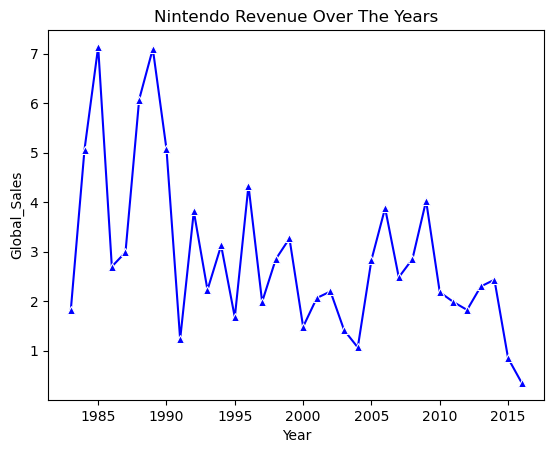

In [59]:
sns.lineplot(x='Year',y='Global_Sales',data=df_nintendo_grouped,color='blue',marker='^')
plt.title('Nintendo Revenue Over The Years')
plt.show()

### It is evident from the above graph that Nintendo sold more copies of their games on average before 1990 compared to recently and regardless, they are coming out with more games over the years

In [60]:
df_nintendo['Name'].value_counts().sum()

696

In [61]:
df_nintendo_years = df_nintendo.groupby('Year')['Publisher_parent'].count().rename('Number_of_games_released').reset_index()

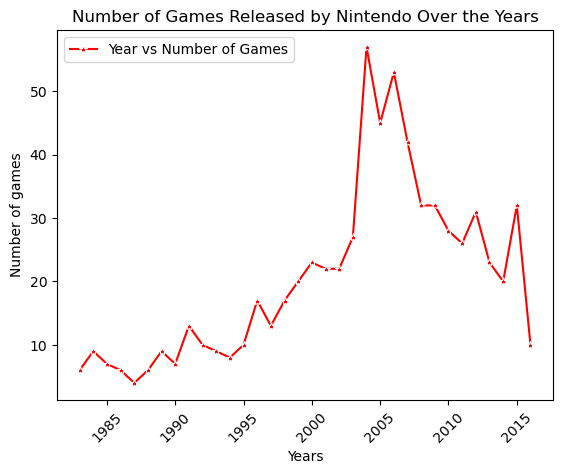

In [62]:
sns.lineplot(x='Year',y='Number_of_games_released',data=df_nintendo_years,color='red',marker='*',label='Year vs Number of Games')
plt.title('Number of Games Released by Nintendo Over the Years')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Number of games')
plt.xticks(rotation=45)
plt.show()

## It is evident from the above chart that nintendo has published a large number of games between 2000 and 2015 despite decreasing number of sales before significantly reducing number of games published by 2015

In [63]:
df['Genre'].value_counts()

Genre
Action          3251
Sports          2303
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

# Top 5 Genres of all time are
### 1.) Action with 3251 games released
### 2.) Sports with 2303 games released
### 3.) Misc with 1686 games released (Not considering this as Misc is very vague)
### 3.) Role-playing with 1470 games released
### 4.) Shooter with 1282 games released
### 5.) Adventure with 1274 games released

In [64]:
df_genre_alltime = df['Genre'].value_counts().reset_index()
df_genre_new = df_new_games['Genre'].value_counts().reset_index()
df_genre_new.columns = ['Genre','new_count']
df_genre_count = pd.merge(df_genre_alltime,df_genre_new,on='Genre',how='left')
df_genre_count['count_percentage'] = (df_genre_count['count']/df_genre_count['count'].sum())*100
df_genre_count['new_count_percentage'] = (df_genre_count['new_count']/df_genre_count['new_count'].sum())*100

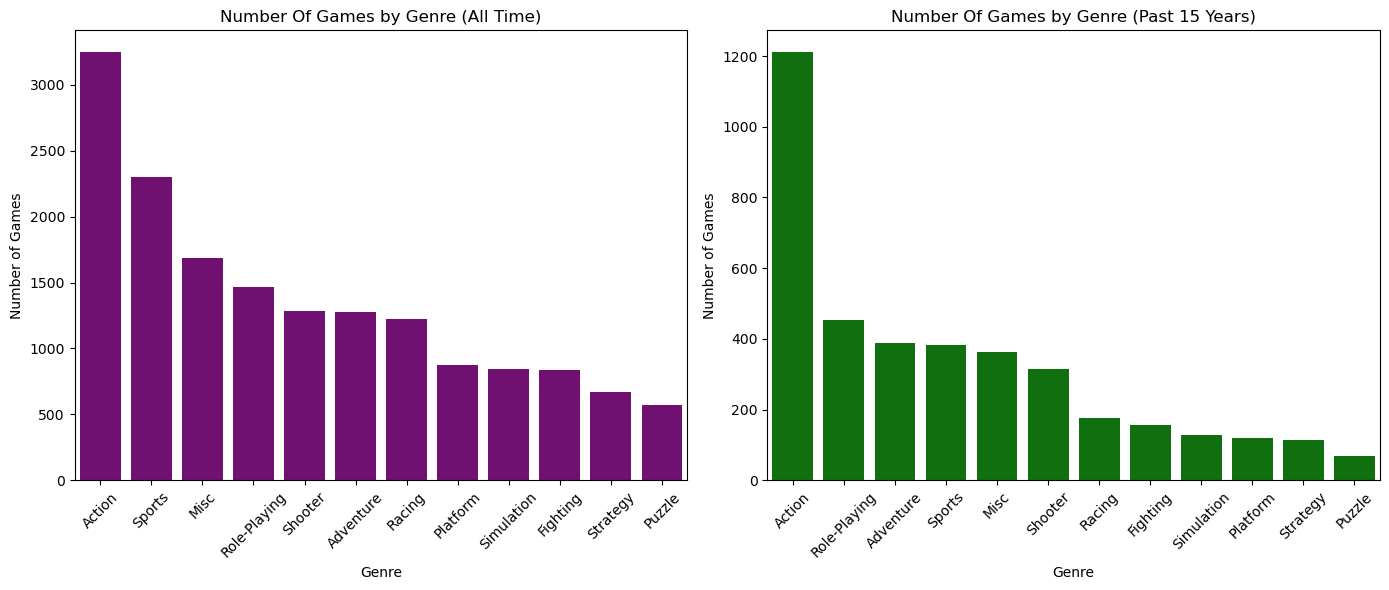

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Increased width for better spacing

# All-time genre count
sns.barplot(x='Genre', y='count', data=df_genre_alltime, color='purple', ax=ax[0])
ax[0].set_title('Number Of Games by Genre (All Time)')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Number of Games')
ax[0].tick_params(axis='x', rotation=45)

# Past 15 years genre count
sns.barplot(x='Genre', y='new_count', data=df_genre_new, color='green', ax=ax[1])
ax[1].set_title('Number Of Games by Genre (Past 15 Years)')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Number of Games')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## It is clear from the above chart pattern that action games have remained consistent but other genres have reduced

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

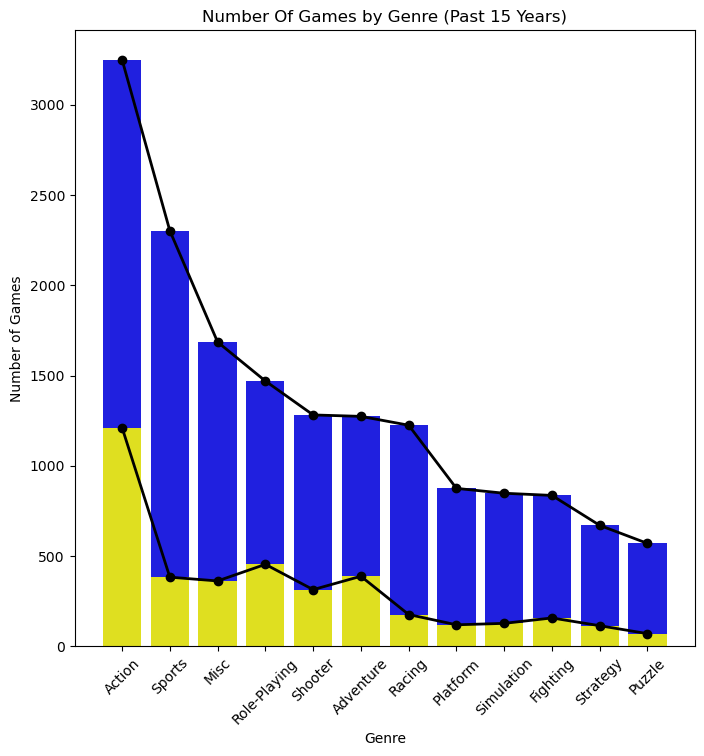

In [66]:
plt.figure(figsize=(8,8))
sns.barplot(x='Genre', y='count', data=df_genre_count, color='blue')
sns.barplot(x='Genre', y='new_count', data=df_genre_count, color='yellow')
x_positions = range(len(df_genre_count))
plt.plot(x_positions, df_genre_count['new_count'], color='black', marker='o', linewidth=2, label='Trend Line (New Count)')
plt.plot(x_positions, df_genre_count['count'], color='black', marker='o', linewidth=2, label='Trend Line (Count)')
plt.title('Number Of Games by Genre (Past 15 Years)')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)

## It is clear from the above chart that there is a trend change whereby other genres such as sports, misc, platform, simulation, fighting, strategy and puzzle genre games have reduced production in the past 15 years as there are similar trend for action, shooter, role-playing and adventure games compared to all time trend

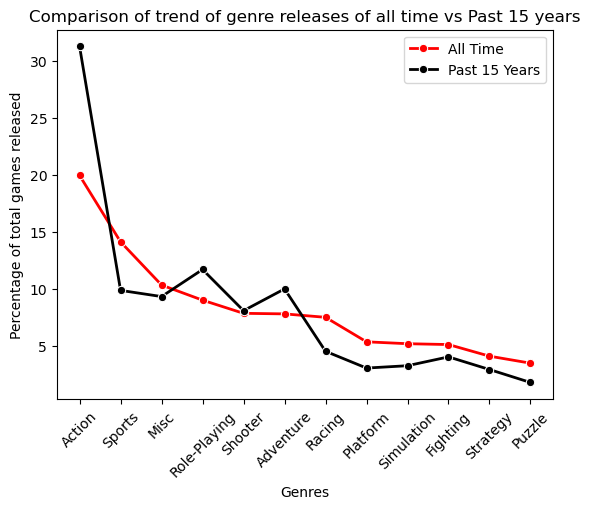

In [67]:
sns.lineplot(data = df_genre_count, x='Genre', y='count_percentage',color='red', marker='o', linewidth=2,label='All Time')
sns.lineplot(data = df_genre_count, x='Genre', y='new_count_percentage',color='black', marker='o', linewidth=2,label='Past 15 Years')
plt.legend()
plt.title('Comparison of trend of genre releases of all time vs Past 15 years')
plt.xlabel('Genres')
plt.ylabel('Percentage of total games released')
plt.xticks(rotation=45)
plt.show()

## Above comparison shows clear increase in the number of Action, Role-playing and Adventure games being produced in the past 15 years. Shooter games are being produced at a similar pace to the all time level, while other genres have decreased.

In [68]:
df_genres_NA = df.groupby('Genre')['NA_Sales'].sum().reset_index()
df_genres_EU = df.groupby('Genre')['EU_Sales'].sum().reset_index()
df_genres_JP = df.groupby('Genre')['JP_Sales'].sum().reset_index()
df_genres_others = df.groupby('Genre')['Other_Sales'].sum().reset_index()
df_genres_global = df.groupby('Genre')['Global_Sales'].sum().reset_index()
df_genres_by_countries = df_genres_global.merge(df_genres_NA,on='Genre',how='left').merge(df_genres_EU,on='Genre',how='left').merge(df_genres_JP,on='Genre',how='left').merge(df_genres_others,on='Genre',how='left')
df_genres_by_countries['Global_Sales_percentage'] = (df_genres_by_countries['Global_Sales']/df_genres_by_countries['Global_Sales'].sum())*100
df_genres_by_countries['NA_Sales_percentage'] = (df_genres_by_countries['NA_Sales']/df_genres_by_countries['NA_Sales'].sum())*100
df_genres_by_countries['EU_Sales_percentage'] = (df_genres_by_countries['EU_Sales']/df_genres_by_countries['EU_Sales'].sum())*100
df_genres_by_countries['JP_Sales_percentage'] = (df_genres_by_countries['JP_Sales']/df_genres_by_countries['JP_Sales'].sum())*100
df_genres_by_countries['Other_Sales_percentage'] = (df_genres_by_countries['Other_Sales']/df_genres_by_countries['Other_Sales'].sum())*100

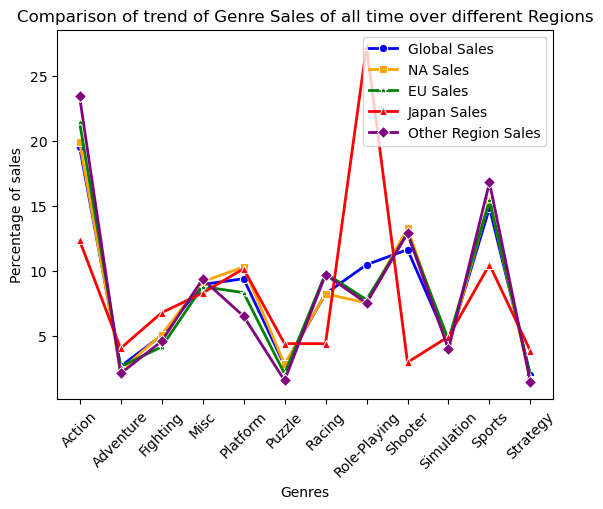

In [69]:
sns.lineplot(data = df_genres_by_countries, x='Genre', y='Global_Sales_percentage',color='blue', marker='o', linewidth=2,label='Global Sales')
sns.lineplot(data = df_genres_by_countries, x='Genre', y='NA_Sales_percentage',color='orange', marker='s', linewidth=2,label='NA Sales')
sns.lineplot(data = df_genres_by_countries, x='Genre', y='EU_Sales_percentage',color='green', marker='*', linewidth=2,label='EU Sales')
sns.lineplot(data = df_genres_by_countries, x='Genre', y='JP_Sales_percentage',color='red', marker='^', linewidth=2,label='Japan Sales')
sns.lineplot(data = df_genres_by_countries, x='Genre', y='Other_Sales_percentage',color='purple', marker='D', linewidth=2,label='Other Region Sales')
plt.legend()
plt.title('Comparison of trend of Genre Sales of all time over different Regions')
plt.xlabel('Genres')
plt.ylabel('Percentage of sales')
plt.xticks(rotation=45)
plt.show()

## It is clear from the above chart that 
### Japan region plays significantly more role-playing and fighting games while playing significantly lesser number of action, racing, shooter and sports games. 
### Trend of purchases of other regions are almost similar except for global salses of role-playing games being higher than EU, NA and Other region sales most probably being influenced by Japan
### Other regions also play significantly more Action and Sports games

In [70]:
df_pubs_sales = df.groupby('Publisher_parent').agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).reset_index()
df_pubs_sales.sort_values(by='Global_Sales',ascending=False,inplace=True)

# Top 5 Publishers of NA and EU regions along with globally are 
### 1.) Nintendo
### 2.) Electronic Arts
### 3.) Activision
### 4.) Sony
### 5.) Ubisoft

# For other regions, top 5 Publishers are
### 1.) Electronic Arts
### 2.) Nintendo
### 3.) Sony
### 4.) Activision
### 5.) Take-Two

# For Japan region, top 5 Publishers are
### 1.) Nintendo
### 2.) Bandai Namco
### 3.) Konami
### 4.) Sony
### 5.) Capcom

# All top publishers are
### Nintendo, Sony, Activision, Electronic Arts, Ubisoft, Take-Two, Bandai Namco, Konami, Capcom

In [71]:
df_pubs_year = df.groupby(['Publisher_parent','Year']).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales',ascending=False).reset_index()
top_publishers = ['Nintendo', 'Sony', 'Electronic Arts', 'Activision', 'Ubisoft']
df_top5 = df_pubs_year[df_pubs_year['Publisher_parent'].isin(top_publishers)]

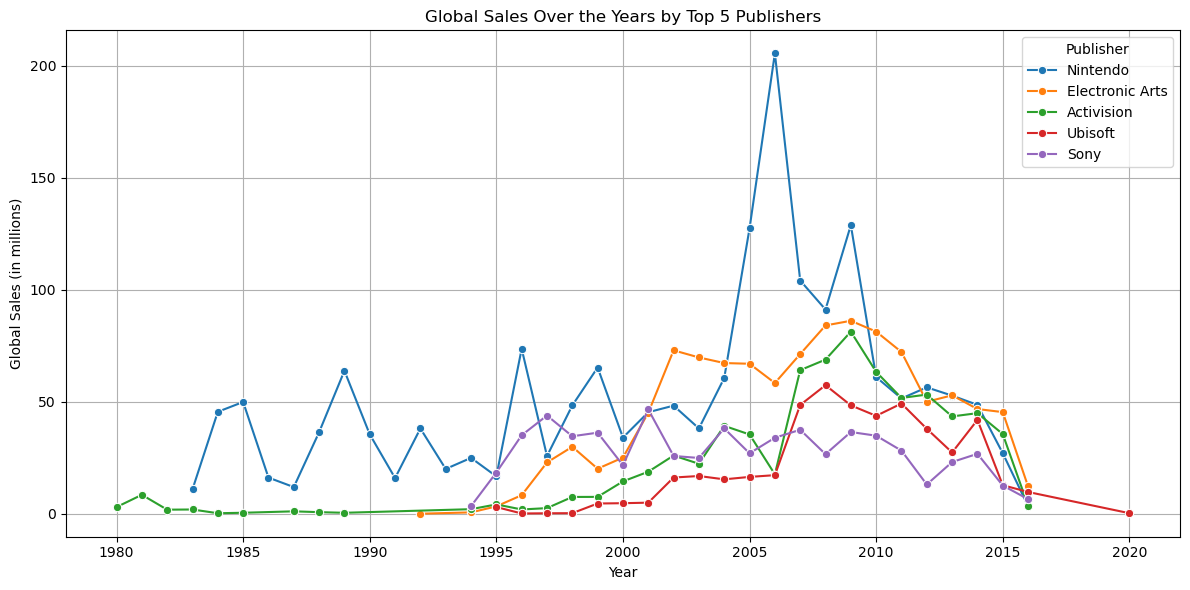

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5, x='Year', y='Global_Sales', hue='Publisher_parent', marker='o')
plt.title('Global Sales Over the Years by Top 5 Publishers')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Publisher')
plt.grid(True)
plt.tight_layout()
plt.show()

## Above graph shows that over the years, out of all top 5 global publishers, Nintendo sales were significantly high till 2010 at which point, it normalized along with others.
## The year 2006 was especially good for Nintendo with 205.61 million games sold across titles. This is most probably due to the release of the Nintendo Wii platform which was released in 2006
## Nintendo saw significant fall in sales after 2009
## All other titles started doing well after 1995 apart from Ubisoft which saw growth after 2000
## Electronic Arts saw signigicant increase of sales in 2000 and significant fall in 2015
## Activision had a steady growth whcih took off significantly after 2005 along with Ubisoft at the same time
## Sony sales have been consistent throughout, but falling gradually from shortly after 2000

# Video Game Sales Analysis

## Dataset Summary
- **Dataset**: Video Game Sales (by platform, genre, publisher, etc.)
- **Source**: Public CSV from Kaggle
- **Features Used**: `Name`, `Platform`, `Year`, `Genre`, `Publisher`, `Global_Sales`, etc.
- **Objective**: Practice EDA skills and explore patterns in global video game sales across time and platforms

---

## Data Cleaning & Preparation
- Checked `df.info()` → No null values in key columns like `Year`, `Genre`, `Platform`, `Global_Sales`
- Converted `Year` to integer to allow proper sorting and time-based analysis
- Dropped unnecessary columns like `Rank`
- Cleaned column names (if required) for easier access

---

## Key Analyses & Visuals

### 1. Total Global Sales Over the Years
- Plotted total sales per year
- Revealed peak years between **2005 and 2010**, with 2008 being a major spike
- Outlier years retained to preserve historical patterns (e.g., Wii's launch)

### 2. Platform Popularity
- Countplot of game count by platform
- `DS`, `PS2`, and `Wii` dominate in terms of number of titles released
- Older consoles like NES and SNES still have a strong legacy footprint

### 3. Genre Distribution
- Bar plot of number of games released per genre
- **Action** and **Sports** genres dominate
- RPGs, Platformers, and Shooters also significant

### 4. Global Sales by Genre
- Aggregated and plotted `Global_Sales` by genre
- **Shooter** and **Platform** genres topped global sales, despite fewer total titles
- Action genre had both quantity and moderate sales

### 5. Top 10 Publishers by Sales
- Grouped by `Publisher`, aggregated `Global_Sales`
- Visualized top 10 publishers
- **Nintendo**, **Electronic Arts**, and **Activision** dominate the leaderboard

---

## 🧠 Insights

- **Nintendo's historical dominance** stands out — both in hardware and publishing
- The **2006–2010 boom** reflects console wars (PS3, Xbox 360, Wii) and massive game library expansion
- **Game volume ≠ total sales** — some genres like Shooter and Platform bring higher revenue per title
- **Action, Shooter, Sports, Racing** genres dominate the global market
- Sharp decrease in **Platformer and Puzzle** games in the past 15 years

---

## Conclusion

This was my **second ever EDA** project. Focused mostly on exploring the dataset, slicing and aggregating values, and practicing Seaborn/Matplotlib. I intentionally kept outliers like the Wii spike to preserve story and learning. While I haven’t covered the business side yet, I’m building muscle on the coding and visualization front.

The grind continues. More refined, interactive, and domain-specific work coming up soon.

